In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from new_plot import *
set_things()


import os
import pandas as pd 
import numpy as np 
import json

a = ['annealing','BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT','Hardness_misc','Poission'
     ,'Refractive_RT','Refractive_misc','thermal_conductivity']
b = ['annealing','BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT']

# prop = 'TLiq'
# base = "data_file_new/" + prop + ".csv"



/Users/sayamsingla/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sayamsingla/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sayamsingla/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sayamsingla/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sayamsingla/anaconda3/lib/python3.7/_collections_abc.

In [2]:
prop = 'TLiq'
dict = {}
for prop in b :
    base = "new_data/" + prop + ".csv"


    seed_df = pd.read_csv(base)
    ele = list(seed_df.columns)[:-1]

    ab = seed_df[ele].apply(lambda x: x.index[x != 0.0].to_list(), axis=1).to_list()
    ab = np.array(ab)

    f , h = np.unique(ab, return_counts = True)

    zipped = zip(f,h)
    zipped = list(zipped)

    res = sorted(zipped, key = lambda x: x[1], reverse =True)[:20]
   
    dict[prop] = res

/Users/sayamsingla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
/Users/sayamsingla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
/Users/sayamsingla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of 

In [ ]:
# df=pd.DataFrame.from_dict(dict,orient='index').transpose()
# df.to_excel('family2.xlsx')

In [ ]:
dict2 = {}
for i in dict:
    print(i)
    dict2[i] = []
    for j in range(len(dict[i])):
   
        if len(dict[i][j][0]) == 3:
            print(dict[i][j][0])
            dict2[i].append(dict[i][j][0])
            
   

In [ ]:
dict2

# Dfsynn

In [ ]:
# chem1 = np.arange(0, 100, 0.2)
# chem2 = np.arange(0, 100, 0.2)
# chem3 = np.arange(0, 100, 0.2)

# import itertools

# dfsynn = list(itertools.product(*[chem1, chem2, chem3]))
# dfsynn = pd.DataFrame(dfsynn)
# dfsynn = dfsynn[dfsynn.sum(axis=1)==100]

# dfsynn_org = dfsynn 

In [ ]:
# dfsynn.to_csv('dfsynn.csv')

dict2.keys()

In [ ]:
# dfsynn = pd.read_csv(f"dfsynn.csv", index_col =0)

# dfx = pd.read_csv(f"new_data/TG.csv")
# dfy = pd.read_csv(f"new_data/Density.csv")

# dfmerge = pd.merge(dfx, dfy, how='inner')

In [ ]:
# prop = 'annealing'
b = ['ND', 'TEC', 'YM' , 'Hardness_RT', 'TG']
for p in range(0, len(b)):
    for p2 in range(0,len(b)):
            if p != p2 :
                p1 = b[p]
                prop = b[p2]
                for l in range(len(dict2[prop])):
                    try: 
                        fm1 = dict2[prop][l]
                       

                    # fm1 = ['Ga', 'Ge', 'Se']

                        plist = [None, None] # prop on x as first element
                        plist[0] = p1
                        plist[1] = prop

                        dfsynn = pd.read_csv(f"dfsynn.csv", index_col =0)
                        dfx = pd.read_csv(f"new_data/{plist[0]}.csv")
                        dfy = pd.read_csv(f"new_data/{plist[1]}.csv")

                        dfmerge = pd.merge(dfx, dfy, how='inner')
                    

            #             print(dfmerge)
                        dfgs = dfmerge[fm1+plist]

                        dfbg = dfgs[dfgs[fm1].sum(axis=1).between(99,101) * dfgs[fm1].astype(bool).sum(axis=1)==3]

                        if len(dfbg.values) is 0: 

                            dfbg = dfx[fm1 + [plist[0]]]
                            if len(dfbg.values) is 0: 
                                dfbg = dfy[fm1 + [plist[1]]]
                            dfbg = dfbg[dfbg[fm1].sum(axis=1).between(99,101) * dfbg[fm1].astype(bool).sum(axis=1)==3]

                        dfsynn = pd.DataFrame(data=dfsynn.values[:,:3], columns = fm1)


                        from xgboost import XGBRegressor
                        from sklearn.neural_network import MLPRegressor
                        import pickle


                        s = {'annealing': 1,'BulkModulus': 2,'Density' : 2,'Littleton': 3,'ND' : 3 ,'Shear_modulus': 3,'softening': 3,'TEC':4,'TG':1,'TLiq': 1,'YM':4,'Hardness_RT': 4}


                        m = {'annealing': 503.64406779661016,'BulkModulus': 44744513157.89474,'Density' : 4.4968691986105975,'Littleton': 634.4466666666667,'ND' : 2.501910709868261 ,'Shear_modulus': 11.517422900062797,'softening': 538.6040730654552,'TEC':2.286291855664033,'TG':515.3934330102145,'TLiq':  965.2505820704733,'YM':52.41651269402789,'Hardness_RT': 2.6349979779260124}

                        s1 = s[plist[0]]
                        s2 = s[plist[1]]
                        m2 = m[plist[1]]
                        m1 = m[plist[0]]

                        # mx = XGBRegressor().fit(dfx[dfx.columns[:-1]].values, dfx[dfx.columns[-1:]])
                        # my = XGBRegressor().fit(dfy[dfy.columns[:-1]].values, dfy[dfy.columns[-1:]])

                        file1= f'model/{plist[0]}_{s1}.pkl'
                        file2 = f'model/{plist[1]}_{s2}.pkl'

                        mx = pickle.load(open(file1, "rb"))
                        my = pickle.load(open(file2, "rb"))
                        # mx = MLPRegressor().fit(dfx[dfx.columns[:-1]].values, dfx[dfx.columns[-1:]])
                        # my = MLPRegressor().fit(dfy[dfy.columns[:-1]].values, dfy[dfy.columns[-1:]])

                        colx = dfx.columns.tolist()[:-1]
                        coly = dfy.columns.tolist()[:-1]
                        dfdummyx = pd.DataFrame(columns=colx)
                        dfdummyy = pd.DataFrame(columns=coly)

                        dfbgx = pd.concat((dfdummyx, dfsynn[fm1])).fillna(0)
                        dfbgy = pd.concat((dfdummyy, dfsynn[fm1])).fillna(0)

                        dfsynn[plist[0]] = mx.predict(dfbgx.values)*m1
                        dfsynn[plist[1]] = my.predict(dfbgy.values)*m2


                        fname = '_'.join(fm1)+ '_' + '_'.join(plist)+'.csv'


                        dir_ = '_'.join(plist)
                        outdir = f'family_points/{dir_}'
            #             print(fname)

                        if not os.path.exists(outdir):
                            os.mkdir(outdir)

                        dfbg.to_csv(f'{outdir}/dfbg_{fname}')
                        dfsynn.to_csv(f'{outdir}/dfsynn_{fname}')
                        print('Done -------- '+str(plist[0]) + "   "  + str(plist[1]))

                    except: 
                        print(str(p1) + "   "  + str(prop))
                        continue

In [ ]:
# prop = 'annealing'
b = ['annealing','BulkModulus','YM','Hardness_RT']


for p in range(0, len(b)-1):
    for p2 in range(0,len(b)):
        if p != p2 and p2> p:
            p1 = b[p]
            prop = b[p2]
            print(p1)
            print(prop)
            print('---')

In [ ]:
# for el in fm1:
#     print(el, dfbg[el].min(), dfbg[el].max(),dfbg[el].mean(), dfbg[el].median())

In [ ]:
# plist = ['ee','ff']
# dir_ = '_'.join(plist)
# outdir = f'family_points/{dir_}'
# if not os.path.exists(outdir):
#     os.mkdir(outdir)

In [ ]:
dfsynn.shape

# Training

In [ ]:
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import pickle

# Input

In [ ]:
# mx = XGBRegressor().fit(dfx[dfx.columns[:-1]].values, dfx[dfx.columns[-1:]])
# my = XGBRegressor().fit(dfy[dfy.columns[:-1]].values, dfy[dfy.columns[-1:]])

file1= f'model/{plist[0]}_{i}.pkl'
file2 = f'model/{plist[1]}_{j}.pkl'

mx = pickle.load(open(file1, "rb"))
my = pickle.load(open(file2, "rb"))
# mx = MLPRegressor().fit(dfx[dfx.columns[:-1]].values, dfx[dfx.columns[-1:]])
# my = MLPRegressor().fit(dfy[dfy.columns[:-1]].values, dfy[dfy.columns[-1:]])

colx = dfx.columns.tolist()[:-1]
coly = dfy.columns.tolist()[:-1]
dfdummyx = pd.DataFrame(columns=colx)
dfdummyy = pd.DataFrame(columns=coly)

dfbgx = pd.concat((dfdummyx, dfsynn[fm1])).fillna(0)
dfbgy = pd.concat((dfdummyy, dfsynn[fm1])).fillna(0)

dfsynn[plist[0]] = mx.predict(dfbgx.values)*mean1
dfsynn[plist[1]] = my.predict(dfbgy.values)*mean2


In [ ]:
fig, ax = plt.subplots(figsize=[6,6])
plt.xlim(dfx[plist[0]].min(), dfx[plist[0]].max())
plt.ylim(dfy[plist[1]].min(), dfy[plist[1]].max())

# plt.show()
plt.scatter(dfbg[plist[0]], dfbg[plist[1]],s=10,zorder=1)#, zorder=0)
plt.scatter(dfsynn[plist[0]], dfsynn[plist[1]],s=1, fc='r',zorder=0)#,zorder=100000)


plt.show()
# plt.xlim(dfx[plist[0]].min(), dfx[plist[0]].max())
# plt.ylim(dfy[plist[1]].min(), dfy[plist[1]].max())

In [ ]:
fname = '_'.join(fm1)+ '_' + '_'.join(plist)+'.csv'

dir_ = '_'.join(plist)
fname

In [ ]:
dfbg.to_csv(f'family_points/{dir_}/dfbg_{fname}')
dfsynn.to_csv(f'family_points/{dir_}/dfsynn_{fname}')

# Combined Plot

In [3]:
import os
import glob 

plot = 'ND_TEC'
path = f"/Users/sayamsingla/Desktop/SURA/chalcogenide_glasses/family_points/{plot}"
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
os.makedirs(plot, exist_ok=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


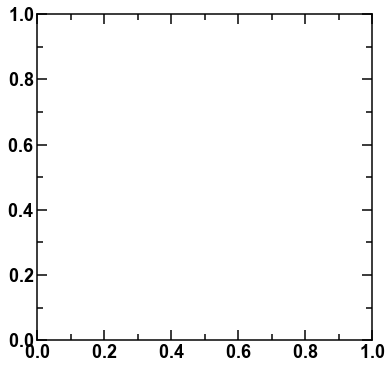

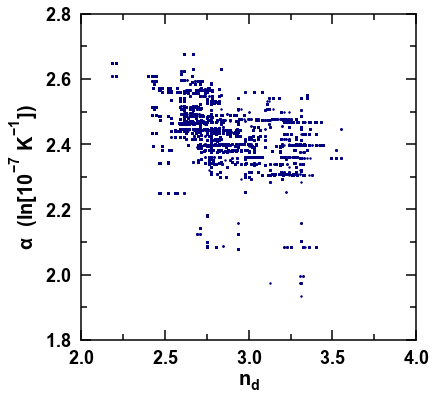

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


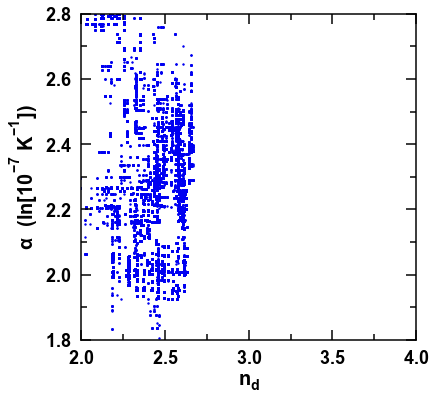

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


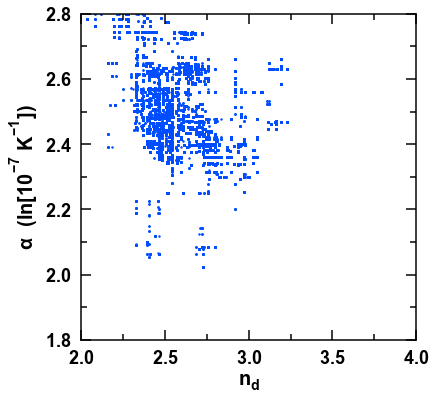

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


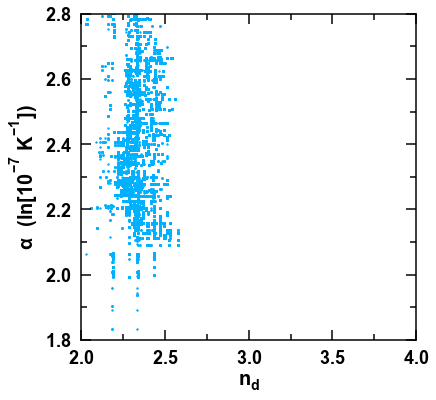

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


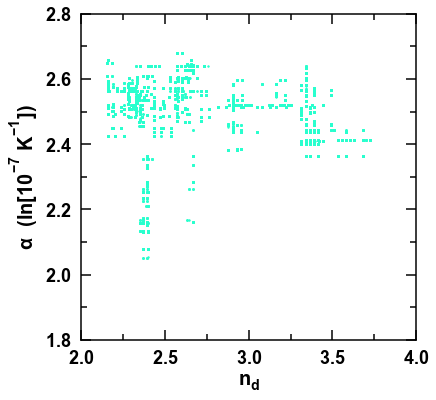

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


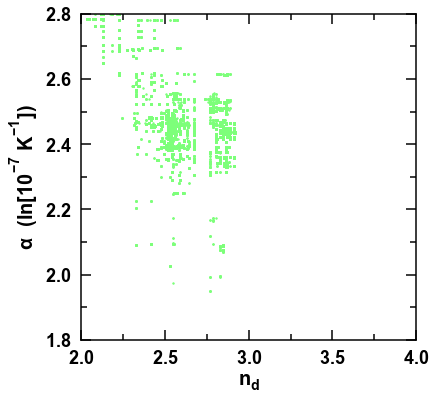

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


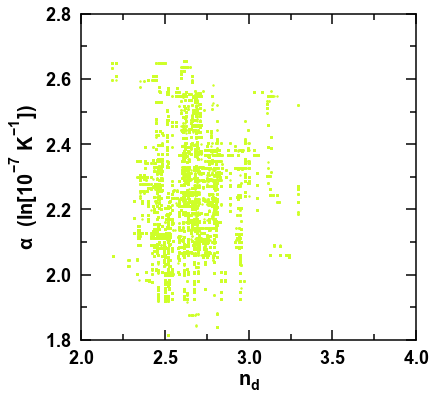

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


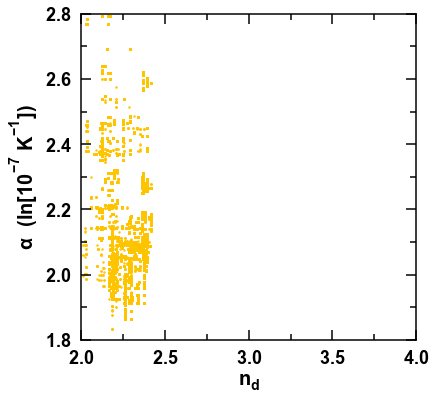

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


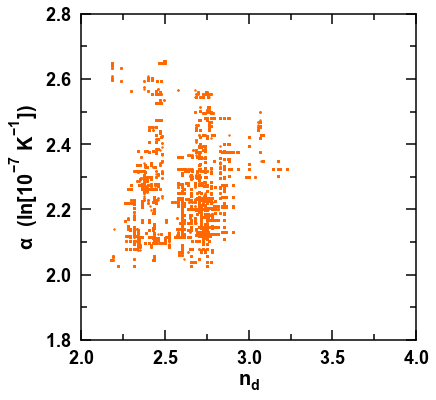

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


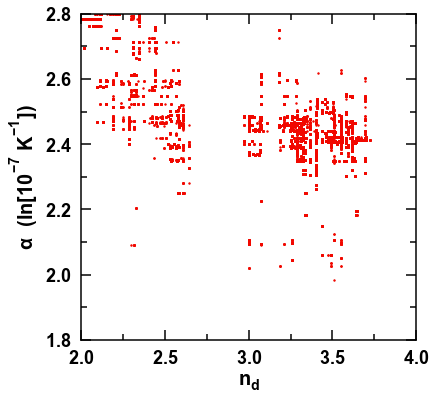

In [6]:


fig, ax = plt.subplots(figsize=[6,6])
# plt.xlim(dfx[plist[0]].min(), dfx[plist[0]].max())
# plt.ylim(0, 7)
c = 0
for f in csv_files:
    if 'dfsynn' in f:
       
        c += 1
        

cm = plt.get_cmap('jet') #'gist_ncar')
# cm = plt.get_cmap('nipy_spectral')
clrs = [cm(1.*(i)/c) for i in range(c)]
i = 0

for f in csv_files:
   
    if 'dfsynn' in f:
        df = pd.read_csv(f, index_col = 0)
        fig, ax = plt.subplots(figsize=[6,6])

        plist = [df.columns[-2], df.columns[-1]]
        label = (f.split('/')[-1][:-4]).split('_')[1:4]
        label = '_'.join(label)
        plt.scatter(df[plist[0]], df[plist[1]],s=2,c = clrs[i] ,zorder=1, label= label )
        ax.tick_params(which='both',pad=10)
        plt.xlabel('$n_d$' )         #(f_.split('/')[-1][:-4]).split('_')[4])
        plt.ylabel('\u03B1'  r'  (ln[$10^{-7}$ $K^{-1}$])')             #(f_.split('/')[-1][:-4]).split('_')[5])
#         '\u03B1'  r'  (ln[$10^{-7}$ $K^{-1}$])' 
#         '$\it{\rho}$ (g/' 'cm\u00b3'+ ')'
#         'H$_{v}$ (GPa)'
        plt.xlim(2,4)
        plt.ylim(1.8,2.8)
        plt.savefig(f'./{plot}/{label}.png')
        plt.show()
        i += 1
        f_ = f
   
        
# ax.tick_params(which='both',pad=10)     
# # plt.legend(markerscale=10,loc = [1,0], frameon = False) 
# plt.xlabel('T$_{g}$ (K)',fontstyle='italic')#(f_.split('/')[-1][:-4]).split('_')[4])
# plt.ylabel(r'$\it{\rho}$ (g/cc)')#(f_.split('/')[-1][:-4]).split('_')[5])
# fig = plt.gcf()
# fig.set_size_inches(8,8)
# plt.xlim(250,800)
# plt.ylim(2,8)
# # plt.savefig(f'family_plots/{plot}.png',bbox_inches='tight', dpi = 800)
# plt.show()

In [7]:
# plt.savefig(f'family_plots/{plot}.png',bbox_inches='tight', dpi = 800)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


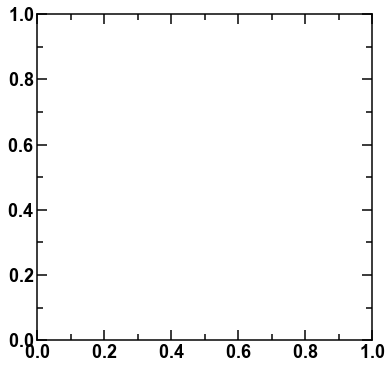

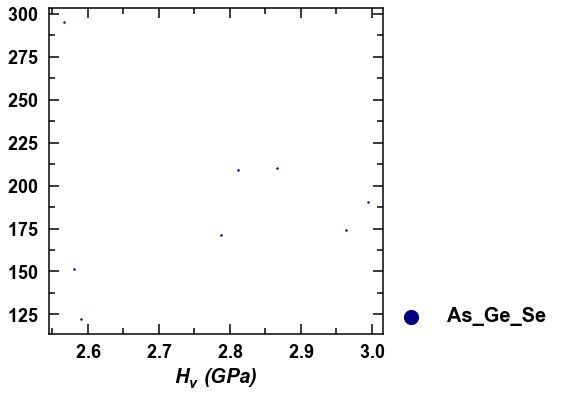

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


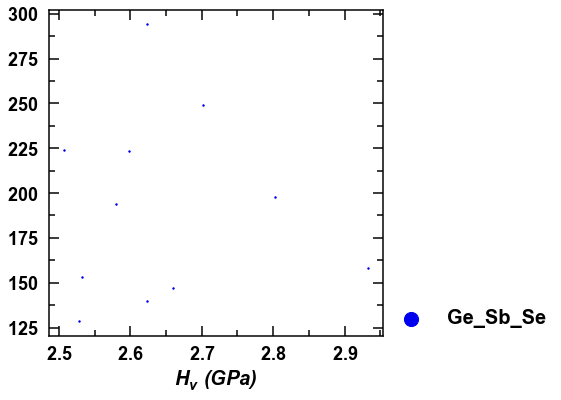

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


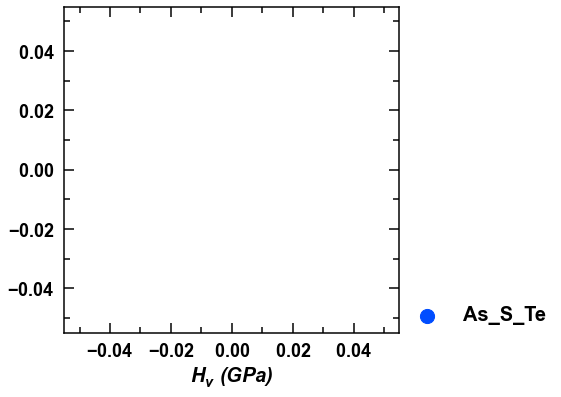

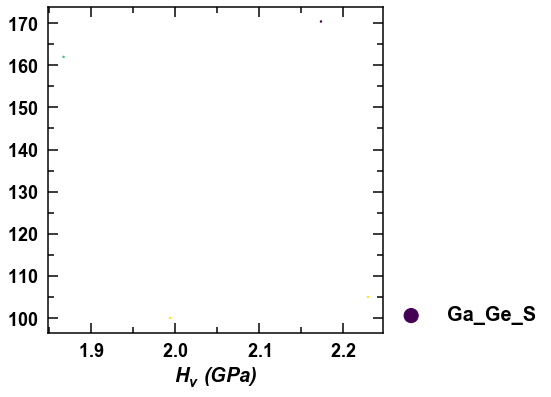

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


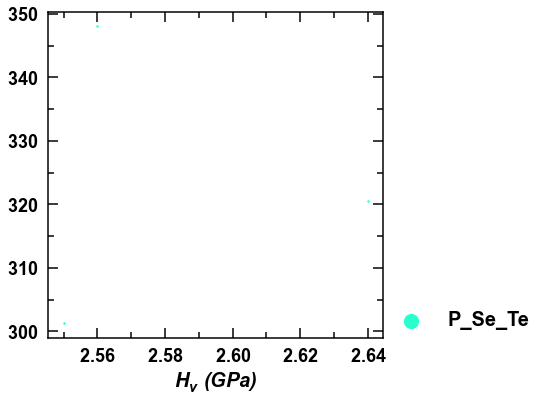

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


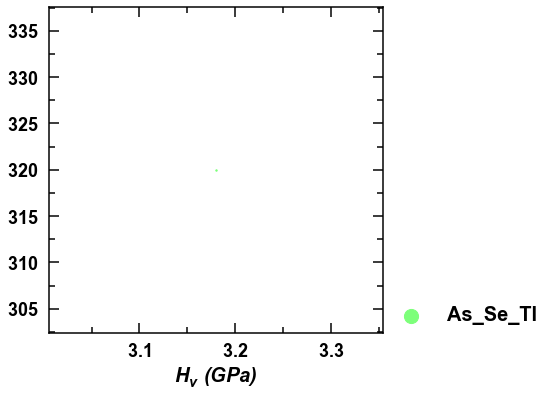

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


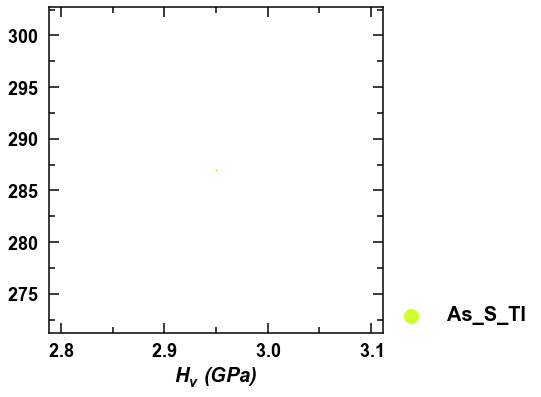

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


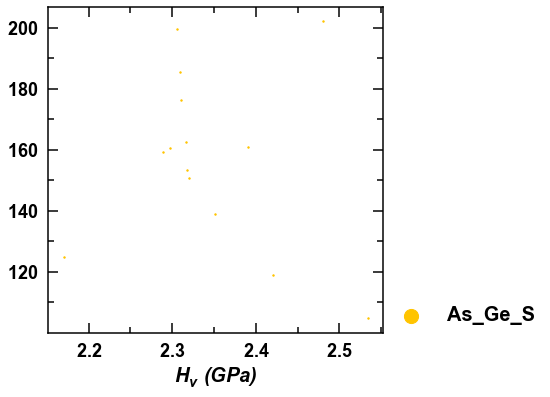

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


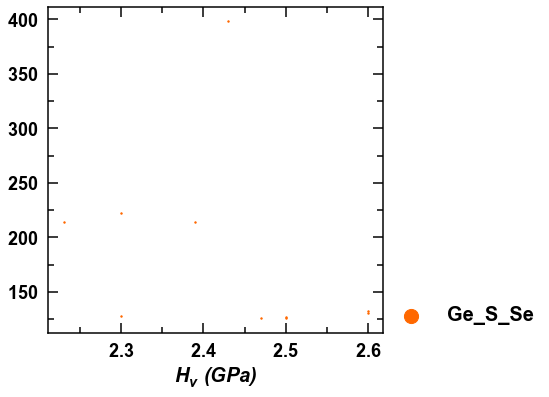

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


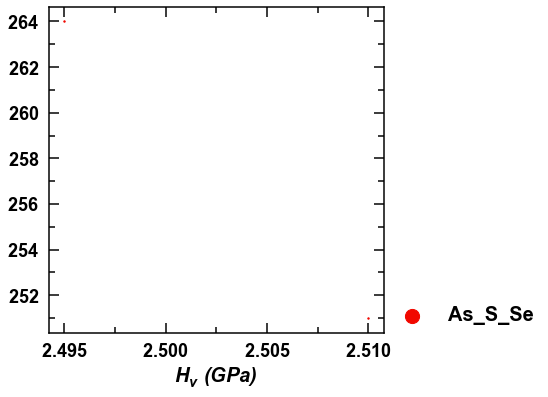

In [8]:
fig, ax = plt.subplots(figsize=[6,6])
# plt.xlim(dfx[plist[0]].min(), dfx[plist[0]].max())
# plt.ylim(0, 7)
c = 0
for f in csv_files:
    if 'dfsynn' in f:
       
        c += 1
        

cm = plt.get_cmap('jet') #'gist_ncar')
# cm = plt.get_cmap('nipy_spectral')
clrs = [cm(1.*(i)/c) for i in range(c)]
i = 0

for f in csv_files:
   
    if 'dfbg' in f:
        df = pd.read_csv(f, index_col = 0)
        fig, ax = plt.subplots(figsize=[6,6])

        plist = [df.columns[-2], df.columns[-1]]
        label = (f.split('/')[-1][:-4]).split('_')[1:4]
        label = '_'.join(label)
        plt.scatter(df[plist[0]], df[plist[1]],s=2,c = clrs[i] ,zorder=1, label= label )
        ax.tick_params(which='both',pad=10)
        plt.xlabel('H$_{v}$ (GPa)',fontstyle='italic')#(f_.split('/')[-1][:-4]).split('_')[4])
#         plt.ylabel(r'$\it{\rho}$ (g/' 'cm\u00b3'+ ')' ,fontstyle='italic')#(f_.split('/')[-1][:-4]).split('_')[5])
        plt.legend(markerscale=10,loc = [1,0], frameon = False) 
#         plt.xlim(2,4)
#         plt.ylim(1.8,2.8)
#         plt.savefig(f'./{plot}/{label}.png')
        plt.show()
        i += 1
        f_ = f
        
# ax.tick_params(which='both',pad=10)     
# # plt.legend(markerscale=10,loc = [1,0], frameon = False) 
# plt.xlabel('T$_{g}$ (K)',fontstyle='italic')#(f_.split('/')[-1][:-4]).split('_')[4])
# plt.ylabel(r'$\it{\rho}$ (g/cc)')#(f_.split('/')[-1][:-4]).split('_')[5])
# fig = plt.gcf()
# fig.set_size_inches(8,8)
# plt.xlim(250,800)
# plt.ylim(2,8)
# # plt.savefig(f'family_plots/{plot}.png',bbox_inches='tight', dpi = 800)
# plt.show()

In [ ]:
'cm\u00b3'